In [1]:
#!pip install lifetimes
import pandas as pd
import numpy as np
from lifetimes import GammaGammaFitter
from lifetimes import BetaGeoFitter
import datetime as dt
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_frequency_recency_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime

In [43]:
df = pd.read_csv("globbing.csv")
len(df)

22000

In [4]:
df.head()

,Customer,Date,Product weight,Product price,Gender,Branch/Locker,Location,InvoiceId
0,RXZ350571,2022-09-01,4.40,24200.0,M,G-Location 1,Yerevan,INV-101
1,ZFZ316415,2022-09-01,5.86,35160.0,M,G-Location 2,Yerevan,INV-102
2,KPR936365,2022-09-01,3.76,30080.0,M,G-Location 2,Yerevan,INV-103
3,PBI351070,2022-09-01,2.74,21920.0,F,G-Location 3,Yerevan,INV-104
4,RFI100548,2022-09-01,5.99,35940.0,M,G-Location 2,Yerevan,INV-105


In [5]:
df.describe()

,Product weight,Product price
count,22000.000000,22000.000000
mean,4.029940,20502.936818
std,2.271784,14797.132388
min,0.100000,200.000000
25%,2.060000,8400.000000
50%,4.030000,16505.000000
75%,5.990000,31520.000000
max,8.000000,64000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer        22000 non-null  object 
 1   Date            22000 non-null  object 
 2   Product weight  22000 non-null  float64
 3   Product price   22000 non-null  float64
 4   Gender          22000 non-null  object 
 5   Branch/Locker   22000 non-null  object 
 6   Location        22000 non-null  object 
 7   InvoiceId       22000 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.3+ MB


In [7]:
#checking for duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
#checking for null values
df.isnull().sum()

Customer          0
Date              0
Product weight    0
Product price     0
Gender            0
Branch/Locker     0
Location          0
InvoiceId         0
dtype: int64

In [9]:
#calculating price for one kg
df['Unit Price'] = df['Product price'] / df['Product weight']

In [10]:
#changeing type to datetime
df["Date"] = pd.to_datetime(df["Date"])

In [11]:
df.head()

,Customer,Date,Product weight,Product price,Gender,Branch/Locker,Location,InvoiceId,Unit Price
0,RXZ350571,2022-09-01,4.40,24200.0,M,G-Location 1,Yerevan,INV-101,5500.0
1,ZFZ316415,2022-09-01,5.86,35160.0,M,G-Location 2,Yerevan,INV-102,6000.0
2,KPR936365,2022-09-01,3.76,30080.0,M,G-Location 2,Yerevan,INV-103,8000.0
3,PBI351070,2022-09-01,2.74,21920.0,F,G-Location 3,Yerevan,INV-104,8000.0
4,RFI100548,2022-09-01,5.99,35940.0,M,G-Location 2,Yerevan,INV-105,6000.0


## **Data Descriptive Visualizations**

# Check the correlation between numerical columns using a heatmap

# Select numerical columns
num_cols = df.select_dtypes(include='number')
corr_matrix = num_cols.corr()
fig = px.imshow(corr_matrix.values,
                x=num_cols.columns,
                y=num_cols.columns,
                color_continuous_scale='RdBu',
                zmin=-1,
                zmax=1)
fig.update_layout(title='Correlation Heatmap')
fig.show()

In [12]:
# Check for outliers in numerical columns using boxplots
numerical_cols = ['Product weight', 'Product price']

for col in numerical_cols:
    fig = px.box(df, x=col)
    fig.show()

In [13]:
# Calculate daily sales
daily_sales = df.groupby('Date')['Product price'].sum()
fig = go.Figure()
fig.add_trace(go.Scatter(x=daily_sales.index, y=daily_sales.values, mode='lines'))
fig.update_layout(title='Daily Sales', xaxis_title='Date', yaxis_title='Total sales')
fig.show()

In [14]:
#Product Weight and Price plot
fig = px.scatter(df, x="Product weight", y="Product price",
                 title="Product Weight vs Price",
                 labels={"Product weight": "Weight (kg)", "Product price": "Price (AMD)"},
                 size="Product weight")
fig.show()

In [15]:
#distributions of prices of purchases based on gender
fig = px.box(df, x='Gender', y='Product price', title='Product price by gender')
fig.show()

In [16]:
sales_by_gender = df.groupby('Gender')['InvoiceId'].count().reset_index()

fig = px.bar(sales_by_gender, x="Gender", y="InvoiceId",
             title="Number of Sales by Gender",
             labels={"Gender": "Gender", "InvoiceId": "Number of Sales"})
fig.show()


In [17]:
# Create a new DataFrame of unique customers
unique_customers = df.drop_duplicates(subset='Customer')

# Calculate gender counts
gender_counts = unique_customers['Gender'].value_counts()

# Create pie chart
fig = px.pie(values=gender_counts.values, names=gender_counts.index, title='Gender Distribution of Unique Customers')
fig.show()


In [18]:
# Group by branch/locker and gender, and sum product price
branch_gender_sales = df.groupby(['Branch/Locker', 'Gender'])['Product price'].sum()

# Reshape data for stacked bar chart
branch_gender_sales = branch_gender_sales.unstack(level=1)

# Create stacked bar chart
trace1 = go.Bar(x=branch_gender_sales.index, y=branch_gender_sales['F'], name='Female')
trace2 = go.Bar(x=branch_gender_sales.index, y=branch_gender_sales['M'], name='Male')
data = [trace1, trace2]
layout = go.Layout(title='Total Sales by Branch/Locker and Gender',
                   xaxis=dict(title='Branch/Locker'),
                   yaxis=dict(title='Total Sales'),
                   barmode='stack')
fig = go.Figure(data=data, layout=layout)
fig.show()


# **RFM**

In [19]:
#grouping data of each customer and creating aggregated columns
df_data_group=df.groupby('Customer').agg({'Date': lambda date: (date.max() - date.min()).days,
                                        'InvoiceId': lambda num: len(num),
                                        'Product weight': lambda quant: quant.sum(),
                                        'Product price': lambda price: price.sum()})

In [20]:
df_data_group.head()

,Date,InvoiceId,Product weight,Product price
Customer,,,,
AAR366684,0,1,6.31,31550.0
ABA698150,164,20,93.46,467890.0
ABF381333,126,7,27.85,130395.0
ABK932885,181,22,87.93,480820.0
ABN926423,203,14,63.74,377840.0


In [21]:
# Change the name of columns
df_data_group.columns=['num_days','num_transactions','num_units','spent_money']
df_data_group.head()


,num_days,num_transactions,num_units,spent_money
Customer,,,,
AAR366684,0,1,6.31,31550.0
ABA698150,164,20,93.46,467890.0
ABF381333,126,7,27.85,130395.0
ABK932885,181,22,87.93,480820.0
ABN926423,203,14,63.74,377840.0


 CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.

 Customer Value = Average Order Value * Purchase Frequency


In [22]:
# Average Order Value
df_data_group['avg_order_value']=df_data_group['spent_money']/df_data_group['num_transactions']

In [23]:
#Calculate purchase frequency
purchase_frequency=sum(df_data_group['num_transactions'])/df_data_group.shape[0]

In [24]:
# Repeat Rate
repeat_rate=df_data_group[df_data_group.num_transactions > 1].shape[0]/df_data_group.shape[0]

In [25]:
#Churn Rate
churn_rate=1-repeat_rate

In [ ]:
purchase_frequency,repeat_rate,churn_rate


In [26]:
# Profit Margin which is taken randomly
df_data_group['profit_margin']=df_data_group['spent_money']*0.05

In [27]:
# Customer Value
df_data_group['CLV']=(df_data_group['avg_order_value']*purchase_frequency)/churn_rate

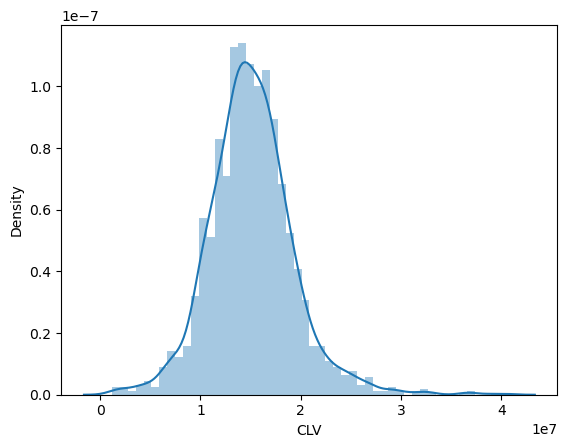

In [28]:
#distribution of CLV
sns.distplot(df_data_group["CLV"])
# plt.savefig("CLV.png")
plt.show()

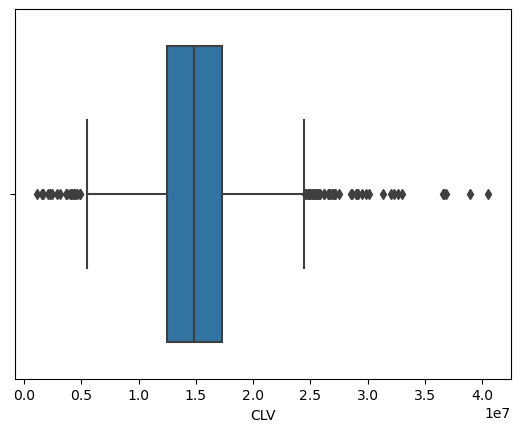

In [29]:
#distribution of CLV with Q1,Q2 and Q3
sns.boxplot(df_data_group["CLV"])
plt.show()

In [30]:
#skewness of CLV distribution
df_data_group["CLV"].skew()

0.6690553526291647

In [31]:
#Customer Lifetime Value (CLTV)
df_data_group['CLTV']=df_data_group['CLV']*df_data_group['profit_margin']

In [32]:
df_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,CLTV
Customer,,,,,,,,
AAR366684,0,1,6.31,31550.0,31550.000000,1577.50,2.313667e+07,3.649809e+10
ABA698150,164,20,93.46,467890.0,23394.500000,23394.50,1.715597e+07,4.013553e+11
ABF381333,126,7,27.85,130395.0,18627.857143,6519.75,1.366043e+07,8.906258e+10
ABK932885,181,22,87.93,480820.0,21855.454545,24041.00,1.602733e+07,3.853131e+11
ABN926423,203,14,63.74,377840.0,26988.571429,18892.00,1.979162e+07,3.739033e+11


In [40]:
today_date = datetime.today()
cltv_df = df.groupby('Customer').agg({'Date': [lambda date: (date.max() - date.min()).days,
                                                     lambda date: (today_date - date.min()).days],
                                           'InvoiceId':      lambda num: num.nunique(),
                                           'Product price':   lambda TotalPrice: TotalPrice.sum()})

In [41]:
cltv_df

Date            InvoiceId Product price
          <lambda_0> <lambda_1>  <lambda>      <lambda>
Customer                                               
AAR366684          0         58         1       31550.0
ABA698150        164        193        20      467890.0
ABF381333        126        191         7      130395.0
ABK932885        181        199        22      480820.0
ABN926423        203        219        14      377840.0
...              ...        ...       ...           ...
ZXR743103        147        162         7      206595.0
ZYG138944        150        170        17      428160.0
ZYH255892        171        189         6      128515.0
ZYV898429        112        172         3       94320.0
ZYY880092        198        226        23      434480.0

[1991 rows x 4 columns]

In [34]:
cltv_df.columns = cltv_df.columns.droplevel(0)
cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]
cltv_df = cltv_df[cltv_df["monetary"] > 0]
cltv_df = cltv_df[cltv_df["frequency"] > 0]
cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

In [35]:
cltv_df.head()


,recency,T,frequency,monetary
Customer,,,,
ABA698150,23.428571,27.571429,20,23394.500000
ABF381333,18.000000,27.285714,7,18627.857143
ABK932885,25.857143,28.428571,22,21855.454545
ABN926423,29.000000,31.285714,14,26988.571429
ABR932411,20.428571,31.714286,2,34360.000000


In [36]:
rfm = pd.DataFrame()
rfm["recency_score"] = pd.qcut(cltv_df['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(cltv_df["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(cltv_df["monetary"], 5, labels=[1, 2, 3, 4, 5])
rfm["RFM_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))

In [37]:
seg_map = {
    r'[1-2][1-2]': 'HIBERNATING',
    r'[1-2][3-4]': 'AT RISK',
    r'[1-2]5': 'CANT LOSE',
    r'3[1-2]': 'ABOUT TO SLEEP',
    r'33': 'NEED ATTENTION',
    r'[3-4][4-5]': 'LOYAL CUSTOMER',
    r'41': 'PROMISING',
    r'51': 'NEW CUSTOMERS',
    r'[4-5][2-3]': 'POTENTIAL LOYALIST',
    r'5[4-5]': 'CHAMPIONS'
}
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.head(10)

,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
Customer,,,,,
ABA698150,4,5,4,45,LOYAL CUSTOMER
ABF381333,5,2,2,52,POTENTIAL LOYALIST
ABK932885,3,5,4,35,LOYAL CUSTOMER
ABN926423,2,4,5,24,AT RISK
ABR932411,4,1,5,41,PROMISING
ABR979310,4,2,3,42,POTENTIAL LOYALIST
ACL447498,3,2,3,32,ABOUT TO SLEEP
ADY744605,1,5,4,15,CANT LOSE
AEF448288,1,5,5,15,CANT LOSE


In [38]:
df_treemap = rfm.groupby('segment').agg('count').reset_index()
fig = px.treemap(df_treemap, path=['segment'], values='RFM_SCORE')
fig.show()

# **MODELING**

In [39]:
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(cltv_df['frequency'],
        cltv_df['recency'],
        cltv_df['T'])

      fun: -17.541213314691642
 hess_inv: array([[ 4.13609980e+00,  4.05123884e+00, -2.87369436e+03,
        -2.87726688e+03],
       [ 4.05123884e+00,  4.21700393e+00, -2.89525510e+03,
        -2.89833447e+03],
       [-2.87369436e+03, -2.89525510e+03,  6.00213067e+07,
         6.00199437e+07],
       [-2.87726688e+03, -2.89833447e+03,  6.00199437e+07,
         6.00186024e+07]])
      jac: array([-5.03745958e-05,  2.57533266e-05,  1.88365088e-05, -1.88438638e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 71
      nit: 41
     njev: 61
   status: 2
  success: False
        x: array([ 1.93652901, -0.63372586, 12.57954029, 17.03044927])


ConvergenceError: 
The model did not converge. Try adding a larger penalizer to see if that helps convergence.


In [ ]:
fig = plt.figure(figsize=(12,8))
p =plot_frequency_recency_matrix(bgf)

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

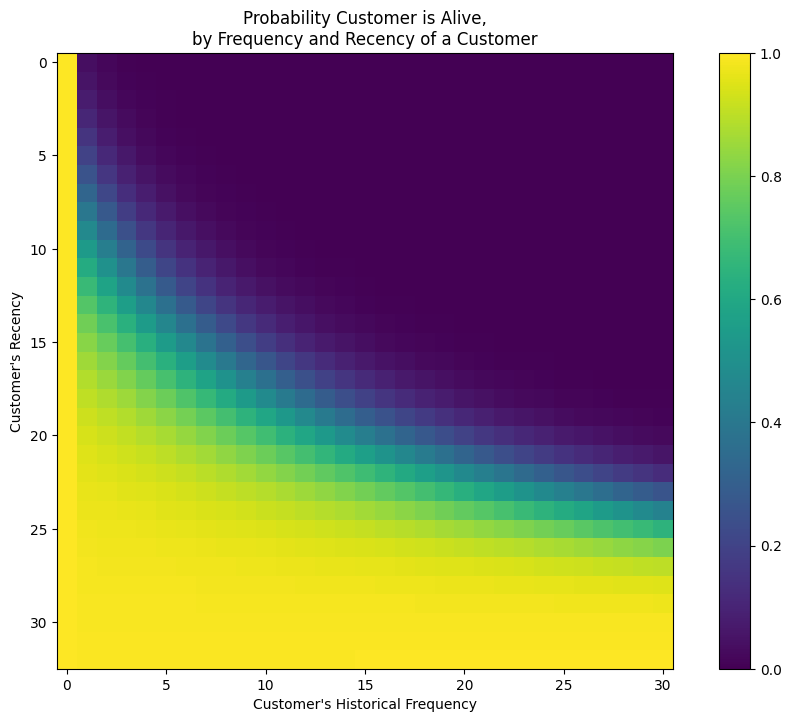

In [47]:
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [48]:
cltv_df["bgf_1week_purchase_pred"] = bgf.predict(1,cltv_df['frequency'],cltv_df['recency'],cltv_df['T'])
cltv_df["bgf_1month_purchase_pred"] = bgf.predict(4,cltv_df['frequency'],cltv_df['recency'],cltv_df['T'])
cltv_df.sort_values("bgf_1week_purchase_pred", ascending=False)
cltv_df.sort_values("bgf_1month_purchase_pred", ascending=False)

,recency,T,frequency,monetary,bgf_1week_purchase_pred,bgf_1month_purchase_pred
Customer,,,,,,
ALN161735,30.142857,31.285714,30,26222.333333,0.710216,2.832599
RFS781349,28.000000,29.571429,27,18823.148148,0.674730,2.690976
TST603776,25.714286,28.285714,26,15255.192308,0.666158,2.656655
LPM479909,28.428571,30.000000,26,21740.769231,0.650429,2.594174
ZFZ316415,30.285714,32.000000,27,22598.518519,0.644375,2.570245
...,...,...,...,...,...,...
JPM977133,4.571429,31.857143,3,9190.000000,0.011691,0.046675
IXY623763,2.714286,27.571429,4,18953.750000,0.008374,0.033427
AZC134292,1.285714,31.571429,2,29297.500000,0.005805,0.023176


In [49]:
#Gamma model
ggf = GammaGammaFitter(penalizer_coef=0.1)
ggf.fit(cltv_df['frequency'], cltv_df['monetary'])

<lifetimes.GammaGammaFitter: fitted with 1960 subjects, p: 0.73, q: 0.10, v: 0.70>

In [50]:
cltv_df["gg_average_profit_pred"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],cltv_df['monetary'])
cltv_df.sort_values("gg_average_profit_pred", ascending=False)

,recency,T,frequency,monetary,bgf_1week_purchase_pred,bgf_1month_purchase_pred,gg_average_profit_pred
Customer,,,,,,,
TBR576106,7.142857,10.285714,2,58445.0,0.312743,1.247273,153647.110850
QYP795221,13.857143,18.428571,2,53140.0,0.249569,0.995900,139700.784150
ATM116911,13.571429,22.000000,2,50215.0,0.222218,0.886923,132011.244923
AQN693888,7.285714,31.571429,2,50040.0,0.047365,0.189116,131551.187021
MZZ541910,7.571429,24.714286,2,49840.0,0.131819,0.526184,131025.406561
...,...,...,...,...,...,...,...
WHN379640,6.000000,8.428571,2,3140.0,0.332583,1.326168,8255.669162
OFG434340,13.571429,17.714286,5,5939.0,0.326411,1.302095,7896.166688
GTQ589388,5.428571,31.571429,2,2882.5,0.027481,0.109723,7578.726820


In [51]:
# 1 Month CLTV prediction with GammaGamma
cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency'],
                                   cltv_df['T'],
                                   cltv_df['monetary'],
                                   time=1,  # 1 month
                                   freq="W",  # frequency of T
                                   discount_rate=0.01)
cltv= cltv.reset_index()
cltv = cltv_df.merge(cltv, on="Customer", how="left")
cltv.sort_values(by="clv", ascending=False).head(5)

,Customer,recency,T,frequency,monetary,bgf_1week_purchase_pred,bgf_1month_purchase_pred,gg_average_profit_pred,clv
1470,TBR576106,7.142857,10.285714,2,58445.0,0.312743,1.247273,153647.110850,206038.722047
1296,QYP795221,13.857143,18.428571,2,53140.0,0.249569,0.995900,139700.784150,149591.056141
58,ATM116911,13.571429,22.000000,2,50215.0,0.222218,0.886923,132011.244923,125891.639339
1125,OOF977762,18.571429,21.571429,2,45367.5,0.233636,0.932474,119267.641025,119579.968852
1321,RFR975330,10.571429,16.714286,2,39032.5,0.256703,1.024261,102613.544956,113005.951057


In [52]:
#12 month CLTV prediction with GammaGamma
cltv_12 = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency'],
                                   cltv_df['T'],
                                   cltv_df['monetary'],
                                   time=12, 
                                   freq="W",  
                                   discount_rate=0.01)
cltv_12 = cltv_12.reset_index()
cltv_12 = cltv_df.merge(cltv_12, on="Customer", how="left")
cltv_12.sort_values(by="clv", ascending=False).head(5)

,Customer,recency,T,frequency,monetary,bgf_1week_purchase_pred,bgf_1month_purchase_pred,gg_average_profit_pred,clv
1470,TBR576106,7.142857,10.285714,2,58445.0,0.312743,1.247273,153647.110850,2.255917e+06
1296,QYP795221,13.857143,18.428571,2,53140.0,0.249569,0.995900,139700.784150,1.648173e+06
58,ATM116911,13.571429,22.000000,2,50215.0,0.222218,0.886923,132011.244923,1.390009e+06
1125,OOF977762,18.571429,21.571429,2,45367.5,0.233636,0.932474,119267.641025,1.320004e+06
1321,RFR975330,10.571429,16.714286,2,39032.5,0.256703,1.024261,102613.544956,1.243668e+06
